# Task
1. Select a dataset of your choice from Kaggle, or you can use one of the following:

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()

    import seaborn as sns
    iris_df = sns.load_dataset('iris')

2. Follow the 7 steps for building a Machine Learning model to create your first ML project. Remember, programming is 80% about researching and learning—don’t hesitate to Google when needed!

3. Once completed, push your project to GitHub and take pride in your work!

4. Check if anyone in Slack needs help. If you can assist someone, that's another reason to feel proud of yourself! 😊

## 7 Steps of building a Machine Learning model
1. Understand the Data: Inspect, explore, and understand the features.
2. Handle Missing Data: Drop or impute missing values.
3. Feature Engineering: Transform, create, or encode new features.
4. Handle Outliers: Detect and handle extreme values.
5. Split Data: Create training and testing datasets.
6. Train the Model: Fit the model to the training data.
7. Evaluate the Model: Test the model and evaluate its performance.

# lets go !!!

In [2]:
# install packages if not done already
%pip install pandas numpy matplotlib seaborn scikit-learn  # It says use % instead of ! that means the command goes to the terminal

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df_st = pd.read_csv('StudentPerformanceFactors.csv')
df_st.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 1. Understand the Data: Inspect, explore, and understand the features.

In [5]:
df_st.shape

(6607, 20)

In [6]:
df_st.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df_st.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6602    False
6603    False
6604    False
6605    False
6606    False
Length: 6607, dtype: bool

In [8]:
df_st.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [9]:
df_st['Distance_from_Home'].value_counts()

Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64

In [10]:
df_st['Parental_Education_Level'].value_counts()

Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64

In [11]:
df_st['Teacher_Quality'].value_counts()

Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64

## 2. Handle Missing Data: Drop or impute missing values.

#### 1. Droping data

In [12]:
df_st_dropped = df_st.drop(['Teacher_Quality' , 'Parental_Education_Level' , 'Distance_from_Home'], axis=1)
print(df_st_dropped.shape)
df_st_dropped.head()

(6607, 17)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Public,Positive,3,No,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Public,Negative,4,No,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Public,Neutral,4,No,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Public,Negative,4,No,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,Public,Neutral,4,No,Female,70


## 3. Feature Engineering: Transform, create, or encode new features.

In [13]:
df_st['Parental_Involvement'] = df_st['Parental_Involvement'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_st['Access_to_Resources'] = df_st['Access_to_Resources'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_st['Motivation_Level'] = df_st['Motivation_Level'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_st['Family_Income'] = df_st['Family_Income'].map({'Low': 1, 'Medium': 2, 'High': 3})
df_st['Internet_Access'] = df_st['Internet_Access'].map({'Yes':1, 'No': 0})
df_st['Extracurricular_Activities'] = df_st['Extracurricular_Activities'].map({'Yes':1, 'No': 0})
df_st['Learning_Disabilities'] = df_st['Learning_Disabilities'].map({'Yes':1, 'No': 0})
df_st['Peer_Influence'] = df_st['Peer_Influence'].map({'Positive':1, 'Negative': -1, 'Neutral': 0})
df_st['Gender'] = df_st['Gender'].map({'Male':1, 'Female': 0})
df_st['School_Type'] = df_st['School_Type'].map({'Public':1, 'Private': 0})

df_st.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,Medium,1,1,3,0,High School,Near,1,67
1,19,64,1,2,0,8,59,1,1,2,2,Medium,1,-1,4,0,College,Moderate,0,61
2,24,98,2,2,1,7,91,2,1,2,2,Medium,1,0,4,0,Postgraduate,Near,1,74
3,29,89,1,2,1,8,98,2,1,1,2,Medium,1,-1,4,0,High School,Moderate,1,71
4,19,92,2,2,1,6,65,2,1,3,2,High,1,0,4,0,College,Near,0,70


In [14]:
df_st_dropped = df_st.drop(['Teacher_Quality' , 'Parental_Education_Level' , 'Distance_from_Home'], axis=1)
print(df_st_dropped.shape)
df_st_dropped.head()

(6607, 17)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,1,1,3,0,1,67
1,19,64,1,2,0,8,59,1,1,2,2,1,-1,4,0,0,61
2,24,98,2,2,1,7,91,2,1,2,2,1,0,4,0,1,74
3,29,89,1,2,1,8,98,2,1,1,2,1,-1,4,0,1,71
4,19,92,2,2,1,6,65,2,1,3,2,1,0,4,0,0,70


### 2. Impute missing values

In [15]:
df_st['Teacher_Quality'] = df_st['Teacher_Quality'].fillna('Unknown')
df_st['Parental_Education_Level'] = df_st['Parental_Education_Level'].fillna('Unknown')
df_st['Distance_from_Home'] = df_st['Distance_from_Home'].fillna('Unknown')
df_st.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [16]:
df_st['Teacher_Quality'] = df_st['Teacher_Quality'].map({'Low': 1, 'Medium': 2, 'High': 3, 'Unknown' : 0})
df_st['Distance_from_Home'] = df_st['Distance_from_Home'].map({'Near': 1, 'Moderate': 2, 'Far': 3, 'Unknown' : 0})
df_st['Parental_Education_Level'] = df_st['Parental_Education_Level'].map({'High School': 1, 'College': 2, 'Postgraduate': 3, 'Unknown' : 0})

df_st.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,3,0,7,73,1,1,0,1,2,1,1,3,0,1,1,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,-1,4,0,2,2,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,0,4,0,3,1,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,-1,4,0,1,2,1,71
4,19,92,2,2,1,6,65,2,1,3,2,3,1,0,4,0,2,1,0,70


## 4. Handle Outliers: Detect and handle extreme values.

In [17]:
# First round
df_st_viz = df_st_dropped[['Hours_Studied' , 'Attendance', 'Sleep_Hours' , 'Previous_Scores' , 'Tutoring_Sessions' , 'Physical_Activity' , 'Exam_Score']]
print(df_st_viz.shape)
df_st_viz.head()

(6607, 7)


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


In [18]:
df_st_viz.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Text(0, 0.5, '')

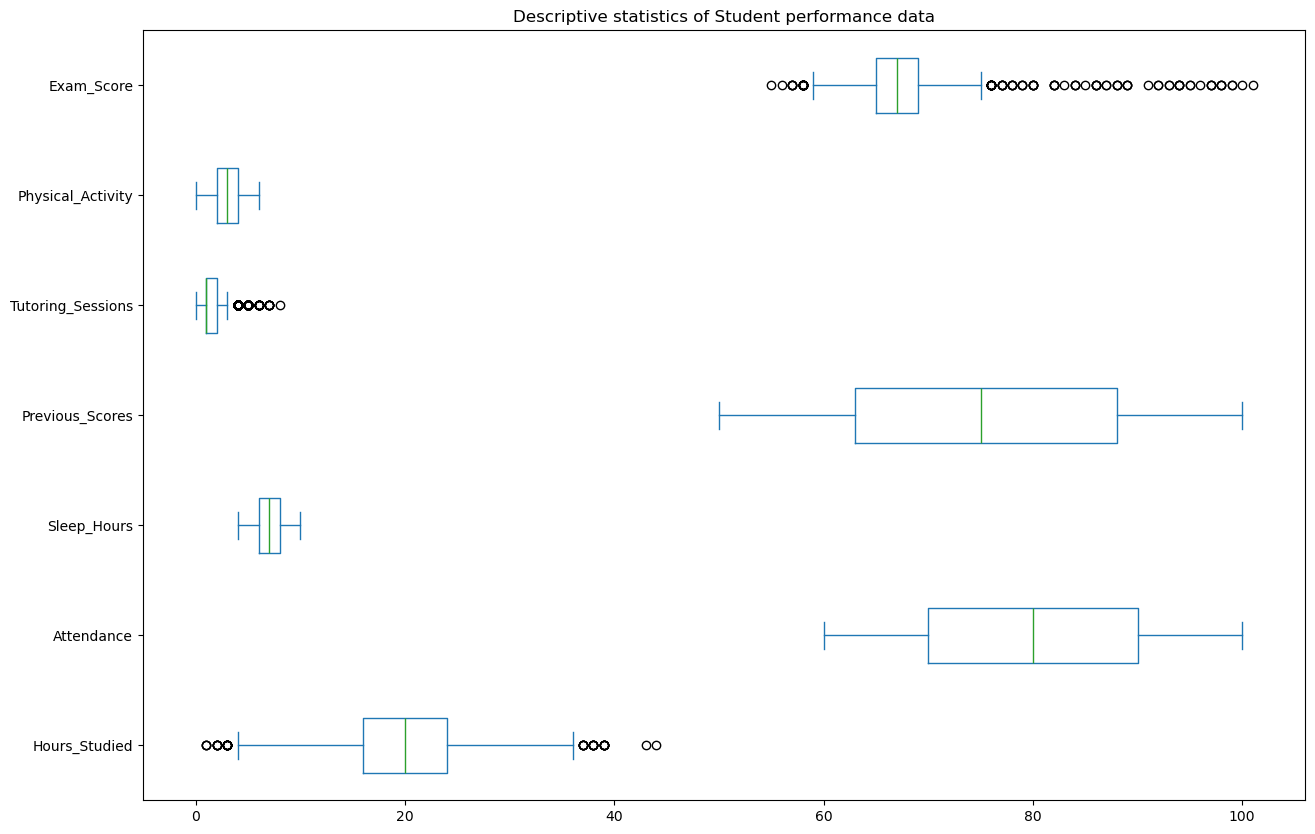

In [19]:
df_st_viz.plot(kind='box', figsize=(15,10), vert=False)
plt.title("Descriptive statistics of Student performance data")
plt.ylabel("")

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

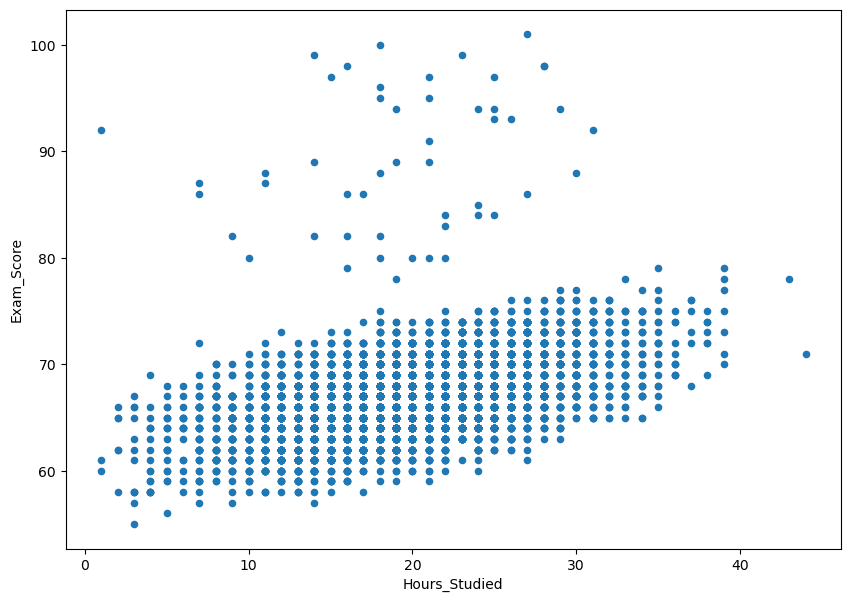

In [20]:
df_st_viz.plot(kind='scatter', x='Hours_Studied', y='Exam_Score' , figsize=(10,7))

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

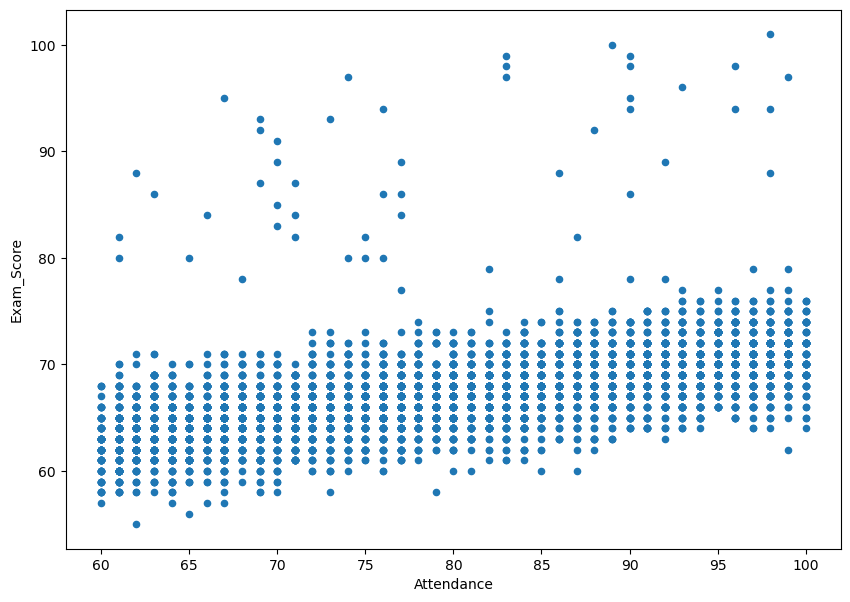

In [21]:
df_st_viz.plot(kind='scatter', x='Attendance', y='Exam_Score' , figsize=(10,7))

* Second round after feature engineering:

In [22]:
df_st_dropped.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,0.695929,0.190858,2.967610,0.105191,0.577267,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.460048,0.755876,1.031231,0.306823,0.494031,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,1.000000,0.000000,3.000000,0.000000,1.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,4.000000,0.000000,1.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,1.000000,1.000000,6.000000,1.000000,1.000000,101.000000


Text(0.5, 1.0, 'Descriptive statistics of Student performance data')

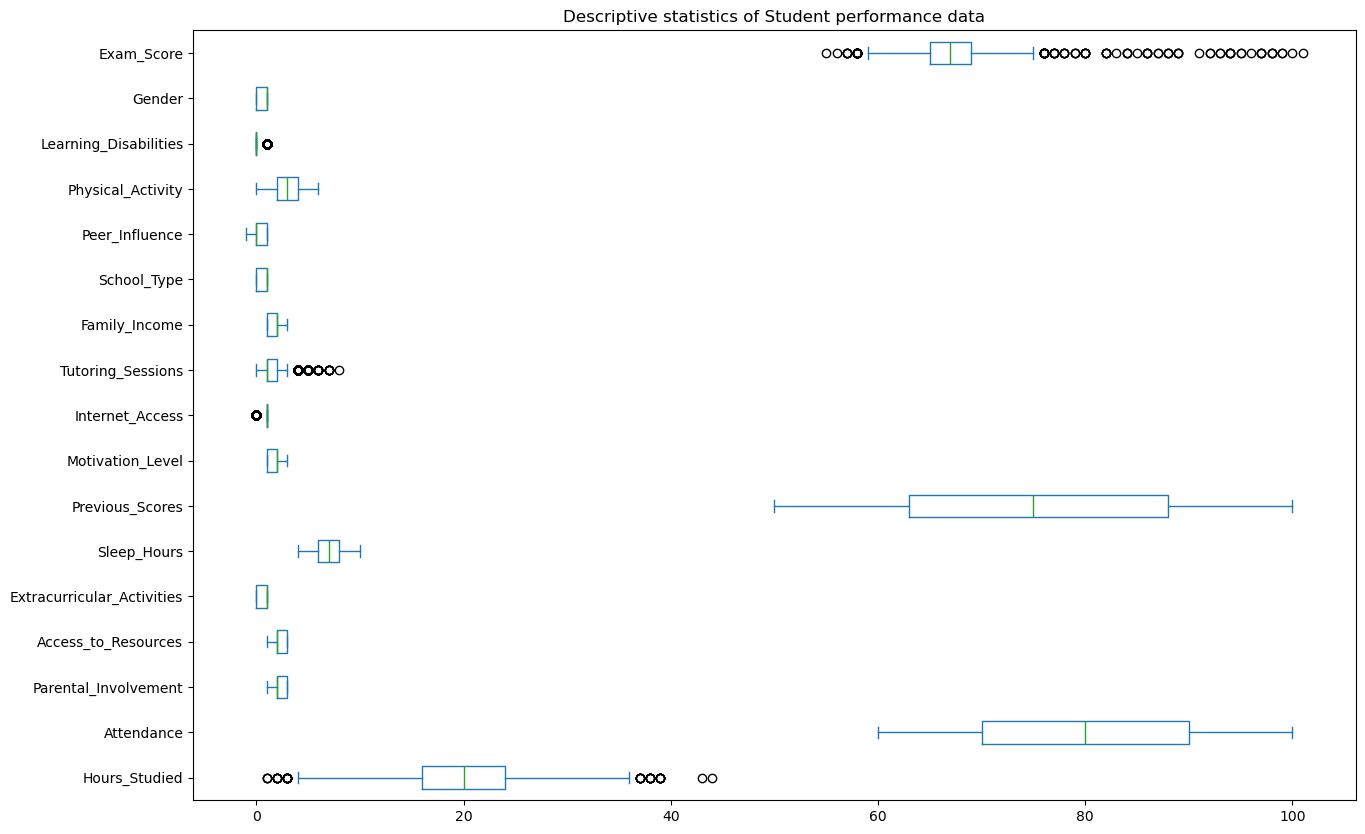

In [23]:
df_st_dropped.plot(kind='box', figsize=(15,10), vert=False)
plt.title("Descriptive statistics of Student performance data")

** Third round including the missing values

In [24]:
df_st.describe()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,2.086423,2.100197,0.596035,7.02906,75.070531,1.906463,0.924474,1.493719,1.787649,2.171636,0.695929,0.190858,2.967610,0.105191,1.682458,1.491448,0.577267,67.235659
std,5.990594,11.547475,0.695521,0.698347,0.490728,1.46812,14.399784,0.695798,0.264258,1.230570,0.742617,0.641836,0.460048,0.755876,1.031231,0.306823,0.799428,0.685173,0.494031,3.890456
min,1.000000,60.000000,1.000000,1.000000,0.000000,4.00000,50.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,2.000000,2.000000,0.000000,6.00000,63.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,0.000000,65.000000
50%,20.000000,80.000000,2.000000,2.000000,1.000000,7.00000,75.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,67.000000
75%,24.000000,90.000000,3.000000,3.000000,1.000000,8.00000,88.000000,2.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,4.000000,0.000000,2.000000,2.000000,1.000000,69.000000
max,44.000000,100.000000,3.000000,3.000000,1.000000,10.00000,100.000000,3.000000,1.000000,8.000000,3.000000,3.000000,1.000000,1.000000,6.000000,1.000000,3.000000,3.000000,1.000000,101.000000


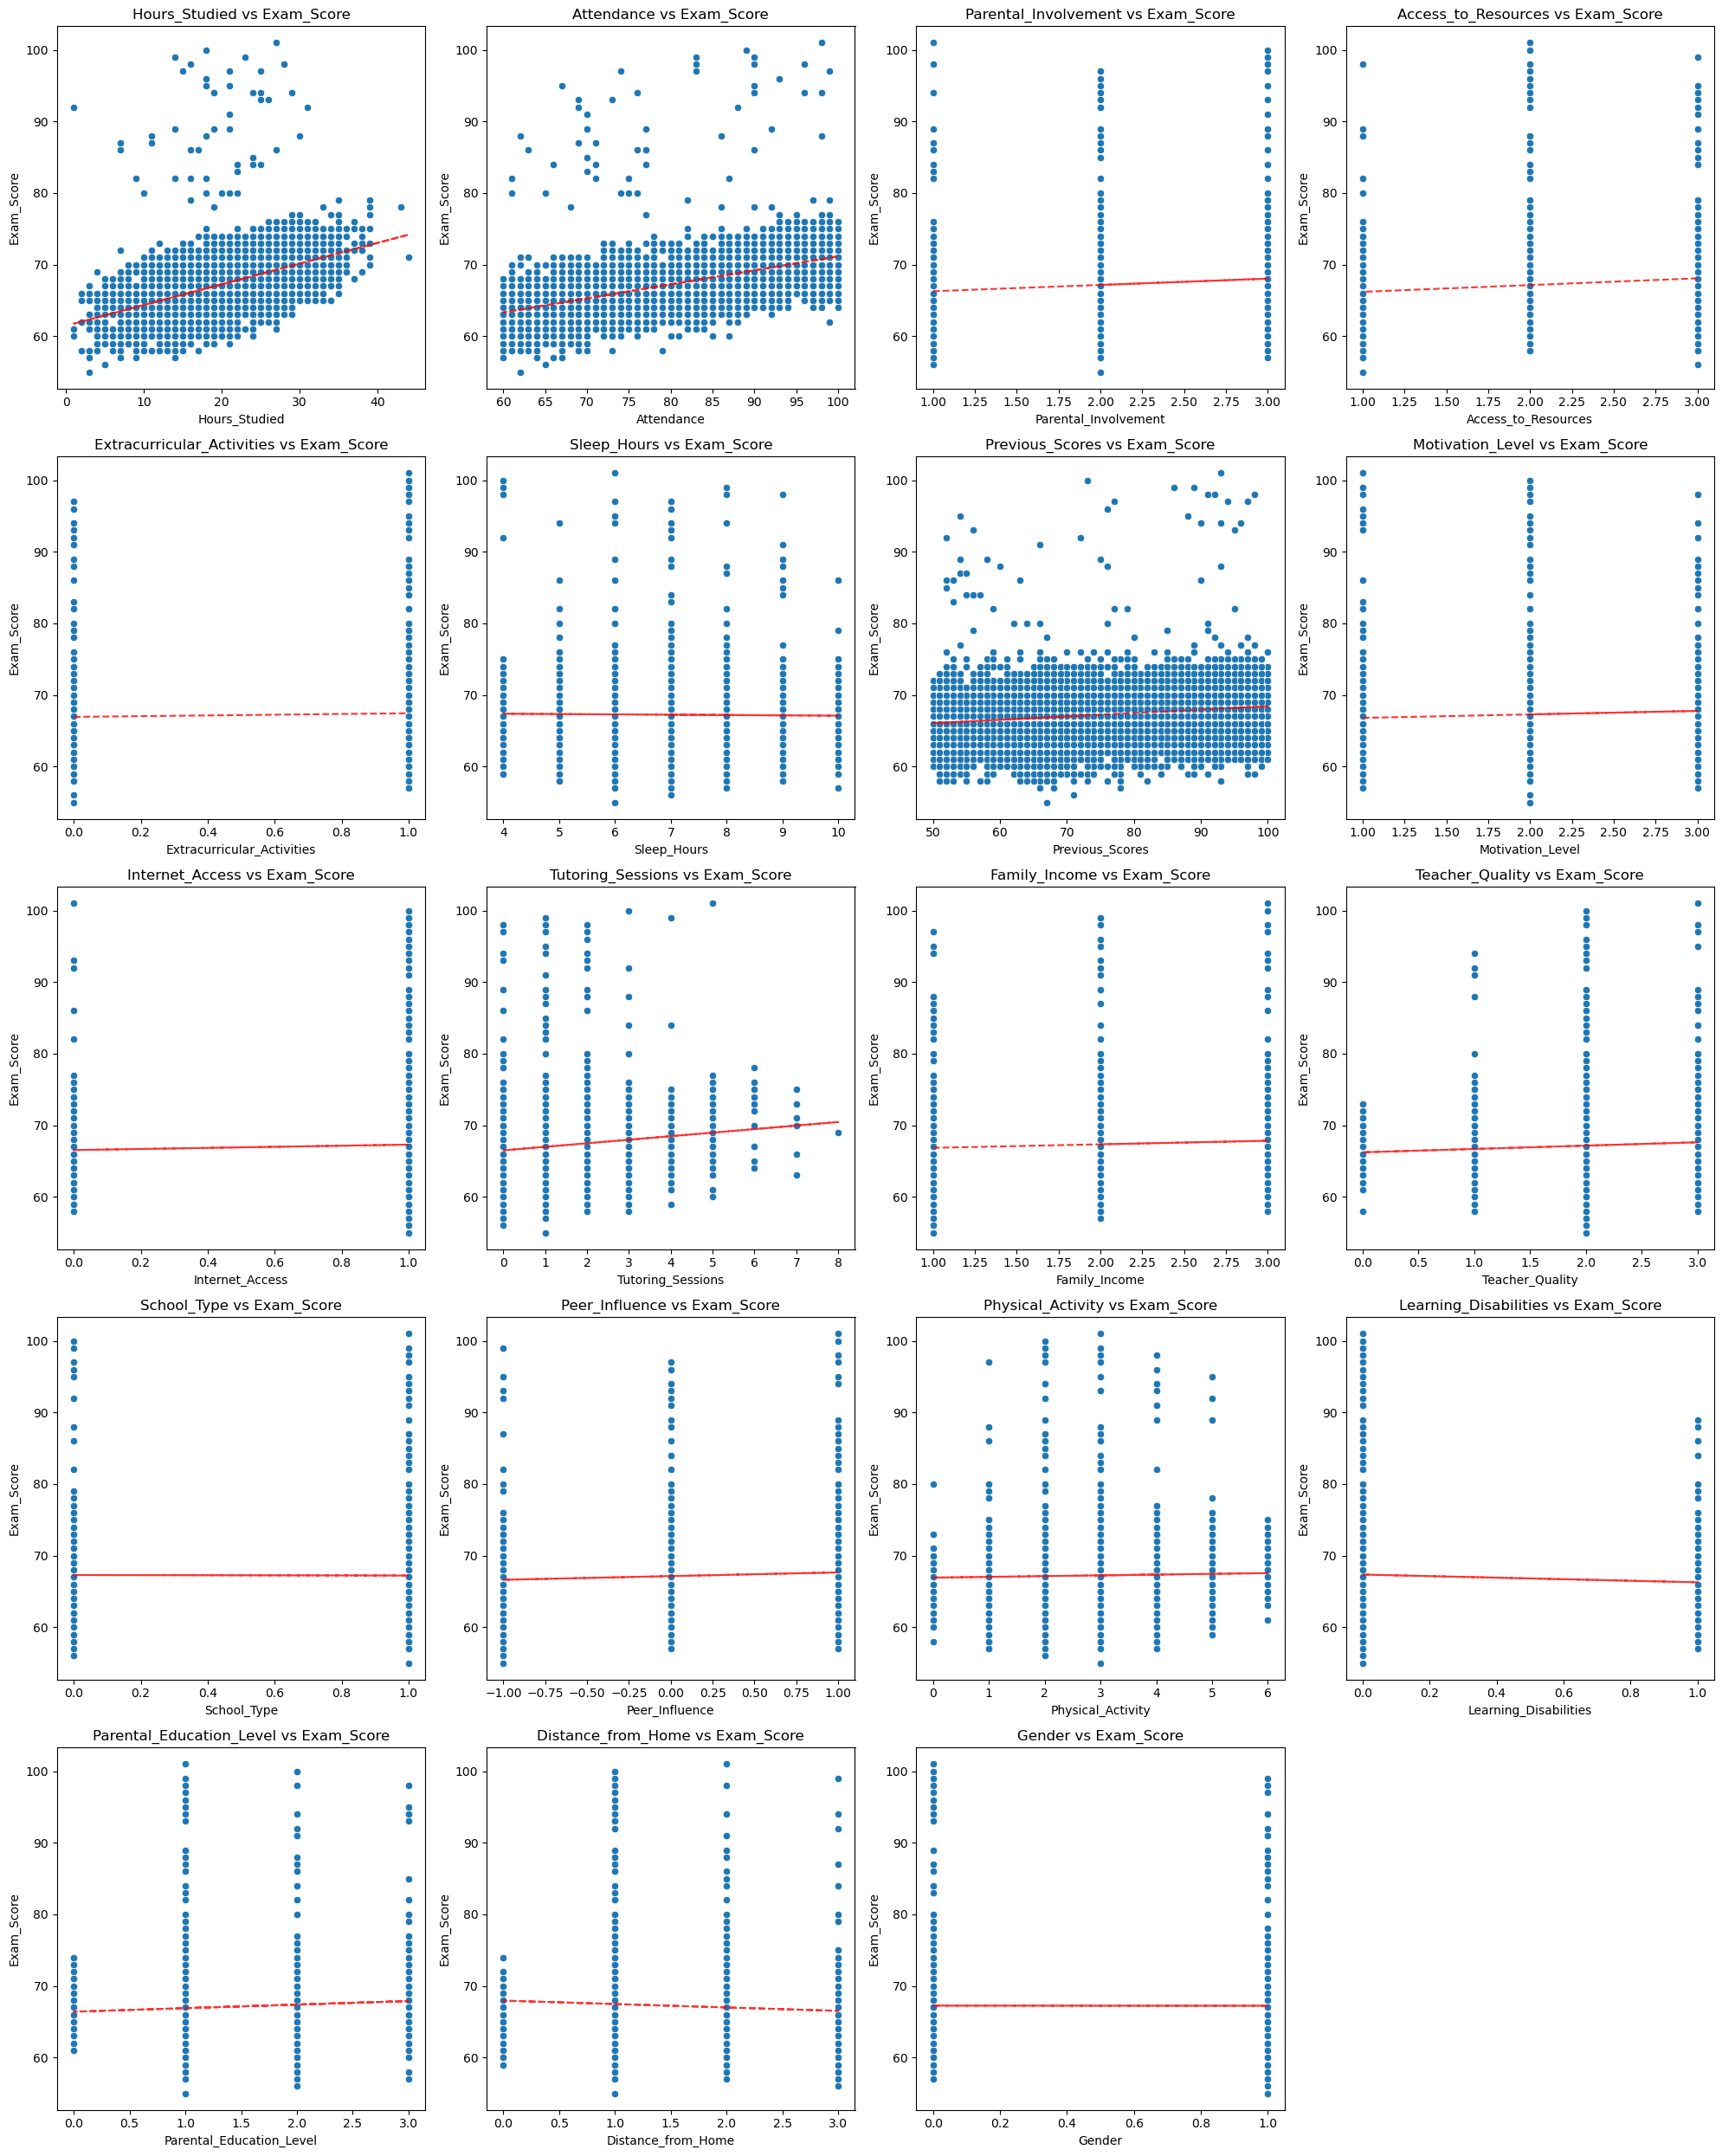

In [29]:
# Set up the plot
fig, axs = plt.subplots(5, 4, figsize=(20, 25))
axs = axs.ravel()

# Create scatter plots for each feature
for i, column in enumerate(df_st.columns[:-1]):  # Exclude the last column (target)
    sns.scatterplot(data=df_st, x=column, y=df_st.columns[-1], ax=axs[i])
    axs[i].set_title(f'{column} vs {df_st.columns[-1]}')
    axs[i].set_xlabel(column)
    axs[i].set_ylabel(df_st.columns[-1])
    
    # Add a trend line
    x = df_st[column]
    y = df_st[df_st.columns[-1]]
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    axs[i].plot(x, p(x), "r--", alpha=0.8)

# Remove the last (empty) subplot
fig.delaxes(axs[-1])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## 5. Split Data: Create training and testing datasets.

First round:
y = df_st_viz['Exam_Score']
x = df_st_viz.drop(['Exam_Score'],axis=1)

Second roung:
y = df_st_dropped['Exam_Score']
x = df_st_dropped.drop(['Exam_Score'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split

y = df_st['Exam_Score']
x = df_st.drop(['Exam_Score'],axis=1)

print(x.columns)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],
      dtype='object')


## 6. Train the Model: Fit the model to the training data.

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train, y_train)


LinearRegression()

## 7. Evaluate the Model: Test the model and evaluate its performance.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²) score:", r2)


Mean Squared Error (MSE): 3.472027362003617
R-squared (R²) score: 0.755567664011342


** First round (Only numeric columns):
- Mean Squared Error (MSE): 5.481834234579136
- R-squared (R²) score: 0.6140763283940447

** Second round (After feature engineering of string columns): 
- Mean Squared Error (MSE): 3.8104069126566706
- R-squared (R²) score: 0.7317455867656177

** Third round (After adding columns with missing values):
- Mean Squared Error (MSE): 3.4720273620036175
- R-squared (R²) score: 0.755567664011342

In [33]:
print(y_test)

print(y_pred)

4249    70
6250    65
961     65
2418    69
3463    71
        ..
761     68
5023    59
1061    62
5381    67
6307    68
Name: Exam_Score, Length: 1983, dtype: int64
[69.36975812 65.10327233 65.5493621  ... 61.899254   66.83047054
 67.72176054]
